In [115]:
import mechanicalsoup as ms
import pandas as pd
import numpy as np
import requests
import re
import os
import glob
import csv
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import json
from bs4 import BeautifulSoup
import urllib.request as rq
import urllib
from zipfile import ZipFile
from io import BytesIO
import lxml
from sklearn import preprocessing
from sklearn import datasets, linear_model
from  sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier

In [2]:
def downloadhistoricaldata(trainQ, testQ, tables,session, flag):
    for link in tables:
        if(trainQ in link['href'] or testQ in link['href']):
            c = 'https://freddiemac.embs.com/FLoan/Data/' + link['href']
            response = session.get(c)
            z = ZipFile(BytesIO(response.content)) 
            z.extractall(os.getcwd())
            flag = 1
    return flag

In [3]:
def login(login, password, qtrain, qtest):
    
    
    s = requests.Session()
    url = "https://freddiemac.embs.com/FLoan/secure/auth.php"
    url2 = "https://freddiemac.embs.com/FLoan/Data/download.php"
    browser = ms.Browser(session = s)
    print("Logging in....")
    login_page = browser.get(url)
    login_form = login_page.soup.find("form",{"class":"form"})
    login_form.find("input", {"name":"username"})["value"] = login
    login_form.find("input", {"name":"password"})["value"] = password
    response = browser.submit(login_form, login_page.url)
    login_page2 = browser.get(url2)
    print("To the continue page...")

    next_form = login_page2.soup.find("form",{"class":"fmform"})
    a= next_form.find("input",{"name": "accept"}).attrs
    a['checked']=True

    response2 = browser.submit(next_form, login_page2.url)
    print("Start Downloading from..."+ response2.url)
    table = response2.soup.find("table",{"class":"table1"})
    
    t = table.find_all('a')
    flag = 0
    flag = downloadhistoricaldata(trainQ, testQ, t,s, flag) 

    if flag == 1:
        print("Data downloaded successfully!!")
    else:
        print("Error in downloading data")


In [7]:
login('rishi.r.rajani@gmail.com','jQcQFxI=','Q12005','Q22005')

Logging in....
To the continue page...
Start Downloading from...https://freddiemac.embs.com/FLoan/Data/download.php
Data downloaded successfully!!


In [3]:
trainQ = 'Q12005'
train_data = pd.read_csv(r"historical_data1_time_"+ trainQ + ".txt" , skipinitialspace=True, sep = "|" ,low_memory = False , header = None)

In [4]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,F105Q1000001,200504,190000.0,0,0,360,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F105Q1000001,200505,190000.0,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F105Q1000001,200506,190000.0,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F105Q1000001,200507,189000.0,0,3,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F105Q1000001,200508,189000.0,0,4,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
testQ = 'Q22005'
test_data = pd.read_csv(r"historical_data1_time_"+ testQ + ".txt" , skipinitialspace=True, sep = "|" ,low_memory = False , header = None)

In [6]:
 train_data.columns=['loan_number','year-month', 'current_actual_upb', 'delq_status','loan_age', 'rem_months', 'repurchase_flag', 'modification_flag', 'zero_balance_code',
                      'zero_bal_date', 'current_int_rate', 'current_def_upb', 'ddlpi', 'mi_recoveries', 'net_sales_proceeds',
                      'non_mi_recoveries', 'expenses', 'legal_costs', 'maint_pres_costs', 'taxes_ins', 'misc_expenses',
                      'actual_loss_calc', 'modification_cost', 'stepmod_ind' , 'dpm_ind' , 'eltv' ]

In [7]:
test_data.columns=['loan_number','month', 'current_actual_upb', 'delq_status','loan_age', 'rem_months', 'repurchase_flag', 'modification_flag', 'zero_balance_code',
                      'zero_bal_date', 'current_int_rate', 'current_def_upb', 'ddlpi', 'mi_recoveries', 'net_sales_proceeds',
                      'non_mi_recoveries', 'expenses', 'legal_costs', 'maint_pres_costs', 'taxes_ins', 'misc_expenses',
                      'actual_loss_calc', 'modification_cost', 'stepmod_ind' , 'dpm_ind' , 'eltv' ]

In [9]:
train_data.head()

,loan_number,year-month,current_actual_upb,delq_status,loan_age,rem_months,repurchase_flag,modification_flag,zero_balance_code,zero_bal_date,...,expenses,legal_costs,maint_pres_costs,taxes_ins,misc_expenses,actual_loss_calc,modification_cost,stepmod_ind,dpm_ind,eltv
0,F105Q1000001,200504,190000.0,0,0,360,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F105Q1000001,200505,190000.0,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F105Q1000001,200506,190000.0,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F105Q1000001,200507,189000.0,0,3,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F105Q1000001,200508,189000.0,0,4,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
test_data.head()

,loan_number,month,current_actual_upb,delq_status,loan_age,rem_months,repurchase_flag,modification_flag,zero_balance_code,zero_bal_date,...,expenses,legal_costs,maint_pres_costs,taxes_ins,misc_expenses,actual_loss_calc,modification_cost,stepmod_ind,dpm_ind,eltv
0,F105Q2000001,200507,214000.0,0,0,360,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F105Q2000001,200508,214000.0,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F105Q2000001,200509,214000.0,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F105Q2000001,200510,213000.0,0,3,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F105Q2000001,200511,213000.0,0,4,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
def cleandf(df):
    df.delq_status = df.delq_status.replace('R', '1').astype('float64')
    df.rem_months = df.rem_months.replace(np.nan, 0)
    df.rem_months = df.rem_months.astype('category')
    df.repurchase_flag = df.repurchase_flag.replace(np.nan, 0)
    df.repurchase_flag = df.repurchase_flag.astype('category')
    df.modification_flag = df.modification_flag.replace(np.nan, 0)
    df.modification_flag = df.modification_flag.astype('category')
    df.zero_balance_code = df.zero_balance_code.replace(np.nan, 0)
    df.zero_balance_code = df.zero_balance_code.astype('category')
    df.zero_bal_date = df.zero_bal_date.replace(np.nan, 0)
    df.zero_bal_date = df.zero_bal_date.astype('category')
    df.current_def_upb = df.current_def_upb.replace(np.nan, 0)
    df.current_def_upb = df.current_def_upb.astype('category')
    df.ddlpi = df.ddlpi.replace(np.nan, 0)
    df.ddlpi = df.ddlpi.astype('category')
    df.mi_recoveries = df.mi_recoveries.replace(np.nan, 0)
    df.net_sales_proceeds = df.net_sales_proceeds.replace(np.nan, 0)
    df.net_sales_proceeds = df.net_sales_proceeds.replace('C', 1)
    df.net_sales_proceeds = df.net_sales_proceeds.replace('U', 0)
    df.net_sales_proceeds.astype('float64')
    df.non_mi_recoveries = df.non_mi_recoveries.replace(np.nan, 0)
    df.expenses = df.expenses.replace(np.nan, 0)
    df.legal_costs = df.legal_costs.replace(np.nan, 0)
    df.maint_pres_costs = df.maint_pres_costs.replace(np.nan, 0)
    df.taxes_ins = df.taxes_ins.replace(np.nan, 0)
    df.misc_expenses = df.misc_expenses.replace(np.nan, 0)
    df.actual_loss_calc = df.actual_loss_calc.replace(np.nan, 0)
    df.modification_cost = df.modification_cost.replace(np.nan, 0)

In [10]:
train_data_copy =train_data.copy(deep = True)

In [11]:
test_data_copy =test_data.copy(deep = True)

In [14]:
cleandf(train_data_copy)

In [15]:
cleandf(test_data_copy)

In [44]:
train_data_copy.head()

,loan_number,year-month,current_actual_upb,delq_status,loan_age,rem_months,repurchase_flag,modification_flag,zero_balance_code,zero_bal_date,...,expenses,legal_costs,maint_pres_costs,taxes_ins,misc_expenses,actual_loss_calc,modification_cost,stepmod_ind,dpm_ind,eltv
0,F105Q1000001,200504,190000.0,0.0,0,360,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,F105Q1000001,200505,190000.0,0.0,1,359,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,F105Q1000001,200506,190000.0,0.0,2,358,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,F105Q1000001,200507,189000.0,0.0,3,357,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,F105Q1000001,200508,189000.0,0.0,4,356,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [50]:
def statusDeliquent(row):
        if row['delq_status'] > 0:
            val = 1
        else:
            val = 0
        return val

In [54]:
train_data_copy['Deliquent'] = train_data_copy.apply(statusDeliquent, axis=1)

In [55]:
test_data_copy['Deliquent'] = test_data_copy.apply(statusDeliquent, axis=1)

In [59]:
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26508106 entries, 0 to 26508105
Data columns (total 27 columns):
loan_number           object
year-month            int64
current_actual_upb    float64
delq_status           float64
loan_age              int64
rem_months            category
repurchase_flag       category
modification_flag     category
zero_balance_code     category
zero_bal_date         category
current_int_rate      float64
current_def_upb       category
ddlpi                 category
mi_recoveries         float64
net_sales_proceeds    object
non_mi_recoveries     float64
expenses              float64
legal_costs           float64
maint_pres_costs      float64
taxes_ins             float64
misc_expenses         float64
actual_loss_calc      float64
modification_cost     float64
stepmod_ind           object
dpm_ind               object
eltv                  float64
Deliquent             int64
dtypes: category(7), float64(13), int64(3), object(4)
memory usage: 4.2+ GB


In [86]:
train_features = train_data_copy._get_numeric_data()

In [88]:
train_features.drop(['eltv'],axis =1, inplace = True)

In [89]:
test_features = test_data_copy._get_numeric_data()

In [90]:
test_features.drop(['eltv'],axis =1, inplace = True)

In [100]:
train_features.drop(['delq_status'],axis =1, inplace = True)

In [101]:
test_features.drop(['delq_status'],axis =1, inplace = True)

In [68]:
# To select the feature with elemination technique
def featureSelectionRFE(selector,data):
    decision = selector.support_
    important_feature = []
    columns = list(data)
    iter=0
    for col in columns:
        if decision[iter]:
            important_feature.append(col)
        iter+=1
    data_new = data.filter(important_feature,axis=1)
    return data_new

In [102]:
def confusionMatrixPrint(acc):
    print("")
    print("----------------------Confusion Matrix--------------------")
    print("                    Actual Result          ")
    print("                   0                  1          ")
    print("Expected  0        ",acc[0][0],"        ",acc[0][1])
    print("")
    print("result    1        ",acc[1][0],"        ",acc[1][1])
    print("")
    

In [110]:
from sklearn.feature_selection import RFE
'''
This function builds a ligistic regression model using the features selected by **RFE** method
'''

def logistic_regressor(training_feature, traning_label, testing_feature, testing_label):
    logreg = linear_model.LogisticRegression(max_iter=20)
    selector = RFE(logreg, 5, step=1)
    selector.fit(training_feature, traning_label)
    testing_feature = featureSelectionRFE(selector, testing_feature)
    traning_feature = featureSelectionRFE(selector, training_feature)
    # we create an instance of Neighbours Classifier and fit the data.
    logreg.fit(traning_feature, training_label)
    print('Training results')
    r=logreg.predict(training_feature)
    cm=confusion_matrix(training_label,r)
    confusionMatrixPrint(cm)
    fpr, tpr, _ = roc_curve(training_label,r)
    result = np.sum(training_label.values.flatten() == r)/r.size
    print("Accuracy:",result*100)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
              label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    print ('\nTesting results')
    z=logreg.predict(testing_feature)
    cm=confusion_matrix(testing_label,z)
    confusionMatrixPrint(cm)
    fpr, tpr, _ = roc_curve(testing_label,z)
    result = np.sum(testing_label.values.flatten() == z)/z.size
    print("Accuracy:",result*100)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
              label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    

In [91]:
y = train_features.Deliquent

In [92]:
y2 = test_features.Deliquent

In [93]:
train_features.drop(['Deliquent'],axis =1, inplace = True )

In [94]:
test_features.drop(['Deliquent'],axis =1, inplace = True )

Training results

----------------------Confusion Matrix--------------------
                    Actual Result          
                   0                  1          
Expected  0         25364890          32

result    1         1129456          13728

Accuracy: 95.73908448985378


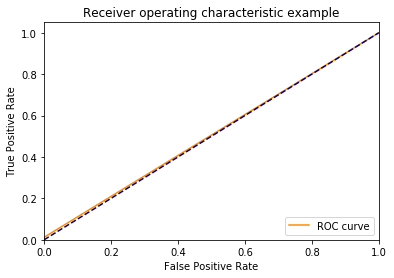


Testing results

----------------------Confusion Matrix--------------------
                    Actual Result          
                   0                  1          
Expected  0         28448824          55

result    1         1404355          18062

Accuracy: 95.29846311321745


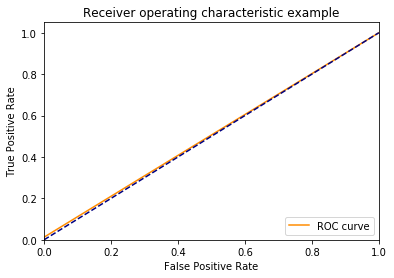

In [109]:
logistic_regressor(train_features, y, test_features,y2)

In [112]:
from sklearn.ensemble import RandomForestClassifier
from  sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt


# Ramdom forest
def Random_forest_classification(training_feature, training_label, testing_feature, testing_label):
    
    # Creating the model
    rf = RandomForestClassifier(n_estimators=100,class_weight={0:1,1:0.001},n_jobs=-1)
    
    # Traning the model with traning data
    rf.fit(training_feature, training_label)
    
    print('Training Data')
    # Testing the model with the testing data
    r=rf.predict(training_feature)
    
    #Computing the confusion matrix
    cm=confusion_matrix(testing_label,r)
    confusionMatrixPrint(cm)
    
    result = np.sum(training_label.values.flatten() == r)/r.size
    print("Accuracy:",result*100)
    
    fpr, tpr, _ = roc_curve(training_label,r)

    plt.plot(fpr, tpr, color='darkorange',label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.plot([0, 0], [0, 1], color='darkorange')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    Act_del = np.count_nonzero(training_label)
    Pred_del =  np.count_nonzero(z)
    length = r.size
    tp_del = cm[0][0]
    fp_del = cm[1][0]
    print('Number of records in dataset', length,'Actual delequents', Act_del, 'Predicted Delenquents',  Pred_del, 'Proper DElenquents', tp_del,'Improper delenqunets', fp_del)
    
    print('\nTesting Data')
    # Testing the model with the testing data
    z=rf.predict(testing_feature)
    
    #Computing the confusion matrix
    cm=confusion_matrix(testing_label,z)
    confusionMatrixPrint(cm)
    
    result = np.sum(testing_label.values.flatten() == z)/z.size
    print("Accuracy:",result*100)
    
    fpr, tpr, _ = roc_curve(testing_label,z)

    plt.plot(fpr, tpr, color='darkorange',label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.plot([0, 0], [0, 1], color='darkorange')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    Act_del = np.count_nonzero(testing_label)
    Pred_del =  np.count_nonzero(z)
    length = z.size
    tp_del = cm[0][0]
    fp_del = cm[1][0]
    print('Number of records in dataset', length,'Actual delequents', Act_del, 'Predicted Delenquents',  Pred_del, 'Proper DElenquents', tp_del,'Improper delenqunets', fp_del)
    
    


C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [114]:
Random_forest_classification(train_features, y, test_features,y2)

JoblibMemoryError: JoblibMemoryError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\rishi\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\rishi\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x000002BDA38C65D0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\rishi\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\rishi\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\r...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000002BDA38C65D0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\rishi\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\rishi\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\r...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    494         if self.poller is not None:
    495             self.poller.start()
    496         self.kernel.start()
    497         self.io_loop = ioloop.IOLoop.current()
    498         try:
--> 499             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    500         except KeyboardInterrupt:
    501             pass
    502 
    503 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
C:\Users\rishi\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    518         sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    519                                finalizer=self._asyncgen_finalizer_hook)
    520         try:
    521             events._set_running_loop(self)
    522             while True:
--> 523                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    524                 if self._stopping:
    525                     break
    526         finally:
    527             self._stopping = False

...........................................................................
C:\Users\rishi\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1753                         logger.warning('Executing %s took %.3f seconds',
   1754                                        _format_handle(handle), dt)
   1755                 finally:
   1756                     self._current_handle = None
   1757             else:
-> 1758                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(760, 1)>>
   1759         handle = None  # Needed to break cycles when an exception occurs.
   1760 
   1761     def _set_coroutine_origin_tracking(self, enabled):
   1762         if bool(enabled) == bool(self._coroutine_origin_tracking_enabled):

...........................................................................
C:\Users\rishi\Anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(760, 1)>)
     83     def cancelled(self):
     84         return self._cancelled
     85 
     86     def _run(self):
     87         try:
---> 88             self._context.run(self._callback, *self._args)
        self._context.run = <built-in method run of Context object>
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (760, 1)
     89         except Exception as exc:
     90             cb = format_helpers._format_callback_source(
     91                 self._callback, self._args)
     92             msg = f'Exception in callback {cb}'

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=760, events=1)
    117             self.writers.remove(fd)
    118         del self.handlers[fd]
    119 
    120     def _handle_events(self, fd, events):
    121         fileobj, handler_func = self.handlers[fd]
--> 122         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    123 
    124     def start(self):
    125         try:
    126             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'Random_forest_classification(train_features, y, test_features,y2)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 11, 30, 15, 19, 24, 180091, tzinfo=tzutc()), 'msg_id': 'ed9c5528a0a2432785cce5f79fc23b1b', 'msg_type': 'execute_request', 'session': 'f6f4de8e25d646e8add5b33f07b34dd9', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'ed9c5528a0a2432785cce5f79fc23b1b', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'f6f4de8e25d646e8add5b33f07b34dd9']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'Random_forest_classification(train_features, y, test_features,y2)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 11, 30, 15, 19, 24, 180091, tzinfo=tzutc()), 'msg_id': 'ed9c5528a0a2432785cce5f79fc23b1b', 'msg_type': 'execute_request', 'session': 'f6f4de8e25d646e8add5b33f07b34dd9', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'ed9c5528a0a2432785cce5f79fc23b1b', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'f6f4de8e25d646e8add5b33f07b34dd9'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'Random_forest_classification(train_features, y, test_features,y2)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 11, 30, 15, 19, 24, 180091, tzinfo=tzutc()), 'msg_id': 'ed9c5528a0a2432785cce5f79fc23b1b', 'msg_type': 'execute_request', 'session': 'f6f4de8e25d646e8add5b33f07b34dd9', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'ed9c5528a0a2432785cce5f79fc23b1b', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='Random_forest_classification(train_features, y, test_features,y2)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'Random_forest_classification(train_features, y, test_features,y2)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('Random_forest_classification(train_features, y, test_features,y2)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('Random_forest_classification(train_features, y, test_features,y2)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='Random_forest_classification(train_features, y, test_features,y2)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'Random_forest_classification(train_features, y, test_features,y2)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='Random_forest_classification(train_features, y, test_features,y2)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-114-440f59d362b2>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 2bd92d057b8, executio...rue silent=False shell_futures=True> result=None>)
   2902                     return True
   2903 
   2904             for i, node in enumerate(to_run_interactive):
   2905                 mod = ast.Interactive([node])
   2906                 code = compiler(mod, cell_name, "single")
-> 2907                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000002BD8EC9A930, file "<ipython-input-114-440f59d362b2>", line 1>
        result = <ExecutionResult object at 2bd92d057b8, executio...rue silent=False shell_futures=True> result=None>
   2908                     return True
   2909 
   2910             # Flush softspace
   2911             if softspace(sys.stdout, 0):

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000002BD8EC9A930, file "<ipython-input-114-440f59d362b2>", line 1>, result=<ExecutionResult object at 2bd92d057b8, executio...rue silent=False shell_futures=True> result=None>)
   2956         outflag = True  # happens in more places, so it's easier as default
   2957         try:
   2958             try:
   2959                 self.hooks.pre_run_code_hook()
   2960                 #rprint('Running code', repr(code_obj)) # dbg
-> 2961                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000002BD8EC9A930, file "<ipython-input-114-440f59d362b2>", line 1>
        self.user_global_ns = <class 'dict'> instance
        self.user_ns = <class 'dict'> instance
   2962             finally:
   2963                 # Reset our crash handler in place
   2964                 sys.excepthook = old_excepthook
   2965         except SystemExit as e:

...........................................................................
C:\Users\rishi\Desktop\ADS_TEAM_SRK\Assignment3\<ipython-input-114-440f59d362b2> in <module>()
----> 1 Random_forest_classification(train_features, y, test_features,y2)

...........................................................................
C:\Users\rishi\Desktop\ADS_TEAM_SRK\Assignment3\<ipython-input-112-37e3d787ca79> in Random_forest_classification(training_feature=          year-month  current_actual_upb  loan_a...              0.0  

[26508106 rows x 13 columns], training_label=0           0
1           0
2           0
3     ...0
Name: Deliquent, Length: 26508106, dtype: int64, testing_feature=           month  current_actual_upb  loan_age  ...              0.0  

[29871296 rows x 13 columns], testing_label=0           0
1           0
2           0
3     ...0
Name: Deliquent, Length: 29871296, dtype: int64)
     10     
     11     # Creating the model
     12     rf = RandomForestClassifier(n_estimators=100,class_weight={0:1,1:0.001},n_jobs=-1)
     13     
     14     # Traning the model with traning data
---> 15     rf.fit(training_feature, training_label)
     16     
     17     print('Training Data')
     18     # Testing the model with the testing data
     19     r=rf.predict(training_feature)

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...  random_state=None, verbose=0, warm_start=False), X=array([[2.0050400e+05, 1.9000000e+05, 0.0000000e...   0.0000000e+00, 0.0000000e+00]], dtype=float32), y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), sample_weight=array([1., 1., 1., ..., 1., 1., 1.]))
    323             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    324                              backend="threading")(
    325                 delayed(_parallel_build_trees)(
    326                     t, self, X, y, sample_weight, i, len(trees),
    327                     verbose=self.verbose, class_weight=self.class_weight)
--> 328                 for i, t in enumerate(trees))
        i = 99
    329 
    330             # Collect newly grown trees
    331             self.estimators_.extend(trees)
    332 

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
MemoryError                                        Fri Nov 30 11:30:00 2018
PID: 8940                 Python 3.7.0: C:\Users\rishi\Anaconda3\python.exe
...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (DecisionTreeClassifier(class_weight=None, criter...        random_state=1654966168, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...  random_state=None, verbose=0, warm_start=False), array([[2.0050400e+05, 1.9000000e+05, 0.0000000e...   0.0000000e+00, 0.0000000e+00]], dtype=float32), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), array([1., 1., 1., ..., 1., 1., 1.]), 57, 100), {'class_weight': {0: 1, 1: 0.001}, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeClassifier(class_weight=None, criter...        random_state=1654966168, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...  random_state=None, verbose=0, warm_start=False), array([[2.0050400e+05, 1.9000000e+05, 0.0000000e...   0.0000000e+00, 0.0000000e+00]], dtype=float32), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), array([1., 1., 1., ..., 1., 1., 1.]), 57, 100)
        kwargs = {'class_weight': {0: 1, 1: 0.001}, 'verbose': 0}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in _parallel_build_trees(tree=DecisionTreeClassifier(class_weight=None, criter...        random_state=1654966168, splitter='best'), forest=RandomForestClassifier(bootstrap=True, class_wei...  random_state=None, verbose=0, warm_start=False), X=array([[2.0050400e+05, 1.9000000e+05, 0.0000000e...   0.0000000e+00, 0.0000000e+00]], dtype=float32), y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), sample_weight=array([1., 1., 1., ..., 1., 1., 1.]), tree_idx=57, n_trees=100, verbose=0, class_weight={0: 1, 1: 0.001})
    116                 warnings.simplefilter('ignore', DeprecationWarning)
    117                 curr_sample_weight *= compute_sample_weight('auto', y, indices)
    118         elif class_weight == 'balanced_subsample':
    119             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    120 
--> 121         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeClassifier.fit of Deci...       random_state=1654966168, splitter='best')>
        X = array([[2.0050400e+05, 1.9000000e+05, 0.0000000e...   0.0000000e+00, 0.0000000e+00]], dtype=float32)
        y = array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])
        sample_weight = array([1., 1., 1., ..., 1., 1., 1.])
        curr_sample_weight = array([1., 1., 1., ..., 0., 0., 1.])
    122     else:
    123         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
    124 
    125     return tree

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...        random_state=1654966168, splitter='best'), X=array([[2.0050400e+05, 1.9000000e+05, 0.0000000e...   0.0000000e+00, 0.0000000e+00]], dtype=float32), y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), sample_weight=array([1., 1., 1., ..., 0., 0., 1.]), check_input=False, X_idx_sorted=None)
    785 
    786         super(DecisionTreeClassifier, self).fit(
    787             X, y,
    788             sample_weight=sample_weight,
    789             check_input=check_input,
--> 790             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
    791         return self
    792 
    793     def predict_proba(self, X, check_input=True):
    794         """Predict class probabilities of the input samples X.

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...        random_state=1654966168, splitter='best'), X=array([[2.0050400e+05, 1.9000000e+05, 0.0000000e...   0.0000000e+00, 0.0000000e+00]], dtype=float32), y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), sample_weight=array([1., 1., 1., ..., 0., 0., 1.]), check_input=False, X_idx_sorted=None)
    357                                            max_depth,
    358                                            max_leaf_nodes,
    359                                            self.min_impurity_decrease,
    360                                            min_impurity_split)
    361 
--> 362         builder.build(self.tree_, X, y, sample_weight, X_idx_sorted)
        builder.build = <built-in method build of sklearn.tree._tree.DepthFirstTreeBuilder object>
        self.tree_ = <sklearn.tree._tree.Tree object>
        X = array([[2.0050400e+05, 1.9000000e+05, 0.0000000e...   0.0000000e+00, 0.0000000e+00]], dtype=float32)
        y = array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])
        sample_weight = array([1., 1., 1., ..., 0., 0., 1.])
        X_idx_sorted = None
    363 
    364         if self.n_outputs_ == 1:
    365             self.n_classes_ = self.n_classes_[0]
    366             self.classes_ = self.classes_[0]

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\tree\_tree.cp37-win_amd64.pyd in sklearn.tree._tree.DepthFirstTreeBuilder.build()

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\tree\_tree.cp37-win_amd64.pyd in sklearn.tree._tree.DepthFirstTreeBuilder.build()

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\tree\_tree.cp37-win_amd64.pyd in sklearn.tree._tree.Tree._add_node()

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\tree\_tree.cp37-win_amd64.pyd in sklearn.tree._tree.Tree._resize_c()

...........................................................................
C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\tree\_utils.cp37-win_amd64.pyd in sklearn.tree._utils.safe_realloc()

MemoryError: could not allocate 29360128 bytes
___________________________________________________________________________

In [119]:
def Neural_net(training_feature, training_label, testing_feature, testing_label):
    nn = MLPClassifier(solver='adam', alpha=1e-6,hidden_layer_sizes=(10, 2), random_state=3, max_iter=300,warm_start=True)

    # we create an instance of Neighbours Classifier and fit the data.
    nn.fit(training_feature, training_label)
    
    r=rf.predict(training_feature)
    
    #Computing the confusion matrix
    cm=confusion_matrix(testing_label,r)
    confusionMatrixPrint(cm)
    
    result = np.sum(training_label.values.flatten() == r)/r.size
    print("training Data")
    print("Accuracy:",result*100)
    
    fpr, tpr, _ = roc_curve(training_label,r)

    plt.plot(fpr, tpr, color='darkorange',label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.plot([0, 0], [0, 1], color='darkorange')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    print('\nTesting Data')
    z=nn.predict(testing_feature)
    cm=confusion_matrix(testing_label,z)
    confusionMatrixPrint(cm)
    fpr, tpr, _ = roc_curve(testing_label,z)
    result = np.sum(testing_label.values.flatten() == z)/z.size
    print("Accuracy:",result*100)
    plt.plot(fpr, tpr, color='darkorange',
              label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    

In [120]:
Neural_net(train_features, y, test_features,y2)

MemoryError: 